In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import re
import seaborn as sns
import numpy as np

In [3]:
df = pd.read_csv("./mercadoimobiliario.csv", sep= ';')
# extração e correção variavel valor
df['Valor'] = df['Valor'].str.replace(',', ".")
df['Valor'].str.strip()
df['Valor'] = pd.to_numeric(df['Valor'])

df['Data'] = pd.to_datetime(df['Data'], dayfirst=True, format='%d/%m/%Y')
print(df.columns)

df.columns = df.columns.str.strip()
df['tipo_transacao'] = df['Info'].apply(lambda x: x.split('_')[0])
df['tipo_credito'] = df.apply(lambda row: row['Info'].split('_')[1] if row['tipo_transacao'] == 'credito' else None, axis=1)

df['estado'] = df['Info'].apply(lambda x: x.split('_')[-1])
df_organizado_data = df.sort_values(by='Data')
df_organizado_data.columns = ['data', 'info', 'valor', 'tipo_transacao', 'tipo_credito', 'estado']
df_organizado_data = df_organizado_data.reset_index(drop=True)

print(df['tipo_transacao'].unique())
print(df['tipo_credito'].unique())


Index(['Data', 'Info', 'Valor'], dtype='object')
['credito' 'imoveis' 'direcionamento' 'fontes' 'indices' 'contabil']
['estoque' 'contratacao' None]


In [4]:
filtro_imoveis = df_organizado_data[df_organizado_data['tipo_transacao'].str.contains(r'\bimoveis\b', regex = True, case = False)]
filtro_dormitorios_3 = filtro_imoveis[filtro_imoveis['info'].str.contains(r'\wdormitorio\w', regex = True, case = False)]
filtro_dormitorios_3 = filtro_dormitorios_3[~filtro_dormitorios_3['info'].str.contains(r'\wmais\w', regex=True, case= False)]
filtro_dormitorios_3['dormitorios'] = filtro_dormitorios_3['info'].str.extract(r'dormitorio_(\d+)')
filtro_dormitorios_4 = filtro_imoveis[filtro_imoveis['info'].str.contains(r'\wmais\w', regex = True, case = False)]
filtro_dormitorios_4['dormitorios'] = filtro_dormitorios_4['info'].str.extract(r'dormitorio_(\d+)')

C:\Users\diogo\AppData\Local\Temp\ipykernel_5808\2504305013.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtro_dormitorios_4['dormitorios'] = filtro_dormitorios_4['info'].str.extract(r'dormitorio_(\d+)')


In [78]:
imoveis_dormitorios = pd.concat([filtro_dormitorios_3, filtro_dormitorios_4], ignore_index=True)
imoveis_dormitorios = imoveis_dormitorios[['data', 'tipo_transacao', 'estado','dormitorios', 'valor']]
#comentario especial para a Gi, sobre a multiplicação por milhões utilizando '_' como separador para ficar mais fácil a visualização
imoveis_dormitorios['valor']=imoveis_dormitorios['valor']

In [80]:
imoveis_dormitorios.columns = ['data', 'mercado', 'estado', 'quantidade de dormitorios', 'unidades vendidas']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8430 entries, 0 to 8429
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   data                       8430 non-null   datetime64[ns]
 1   mercado                    8430 non-null   object        
 2   estado                     8430 non-null   object        
 3   quantidade de dormitorios  8430 non-null   object        
 4   unidades vendidas          8430 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 329.4+ KB


In [229]:
filtro_tipo_imoveis = filtro_imoveis[filtro_imoveis['info'].str.contains(r'\wtipo\w', regex=True, case=False)]
filtro_tipo_imoveis['tipo'] = filtro_tipo_imoveis['info'].str.extract(r'tipo_([^_]+)')
filtro_tipo_imoveis = filtro_tipo_imoveis[['data', 'valor', 'estado', 'tipo']]
filtro_tipo_imoveis['valor'] = filtro_tipo_imoveis['valor']

C:\Users\diogo\AppData\Local\Temp\ipykernel_5808\490411708.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtro_tipo_imoveis['tipo'] = filtro_tipo_imoveis['info'].str.extract(r'tipo_([^_]+)')


In [230]:
imoveis_tipo_garantia = filtro_imoveis[filtro_imoveis['info'].str.contains(r'\wgarantia\w', regex=True, case=False)]
imoveis_tipo_garantia['garantia'] = imoveis_tipo_garantia['info'].str.extract(r'garantia_([^_]+)')
imoveis_tipo_garantia = imoveis_tipo_garantia[['data', 'valor', 'estado', 'garantia']]
imoveis_tipo_garantia['valor'] = imoveis_tipo_garantia['valor']

C:\Users\diogo\AppData\Local\Temp\ipykernel_5808\3799332141.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imoveis_tipo_garantia['garantia'] = imoveis_tipo_garantia['info'].str.extract(r'garantia_([^_]+)')


In [9]:
imoveis_area = filtro_imoveis[filtro_imoveis['info'].str.contains(r'\warea\w', regex=True, case=False)]
imoveis_area['area'] = imoveis_area['info'].str.extract(r'area_([^_]+)')
imoveis_area = imoveis_area[['data', 'valor', 'estado', 'area']]
imoveis_area.columns= ['data', 'valor m2', 'estado', 'area']

C:\Users\diogo\AppData\Local\Temp\ipykernel_5808\1162883796.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imoveis_area['area'] = imoveis_area['info'].str.extract(r'area_([^_]+)')


In [10]:
imoveis_venda = filtro_imoveis[filtro_imoveis['info'].str.contains(r'\wvalor\w', regex=True, case=False)]
imoveis_venda['venda'] = imoveis_venda['info'].str.extract(r'valor_([^_]+)')
imoveis_venda= imoveis_venda[['data', 'valor', 'estado', 'venda']]

C:\Users\diogo\AppData\Local\Temp\ipykernel_5808\1265954608.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imoveis_venda['venda'] = imoveis_venda['info'].str.extract(r'valor_([^_]+)')


In [21]:
filtro_indices = df_organizado_data[df_organizado_data['tipo_transacao'].str.contains(r'\bindices\b', regex = True, case = False)]
filtro_indices = filtro_indices[filtro_indices['info'].str.contains(r'\wimobiliario\w', regex=True, case=False)]
filtro_indices['indice'] = filtro_indices['info'].str.extract(r'indices_([^_]+)')
filtro_indices = filtro_indices[['data', 'indice', 'valor']]


Text(0, 0.5, 'taxa %')

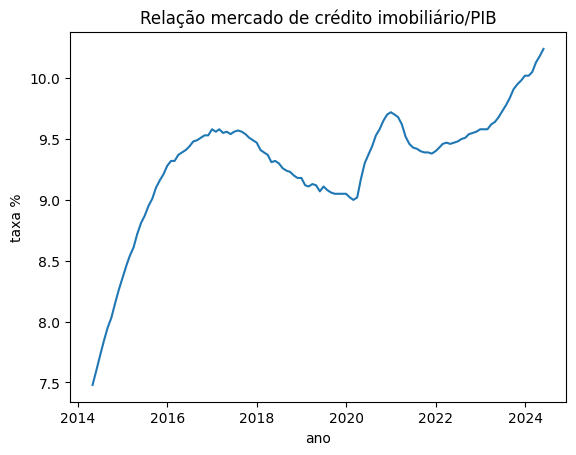

In [28]:
sns.lineplot(x = filtro_indices['data'], y = filtro_indices['valor'])
plt.title('Relação mercado de crédito imobiliário/PIB')
plt.xlabel('ano')
plt.ylabel('taxa %')

Text(0.5, 0, 'Unidade da Federação')

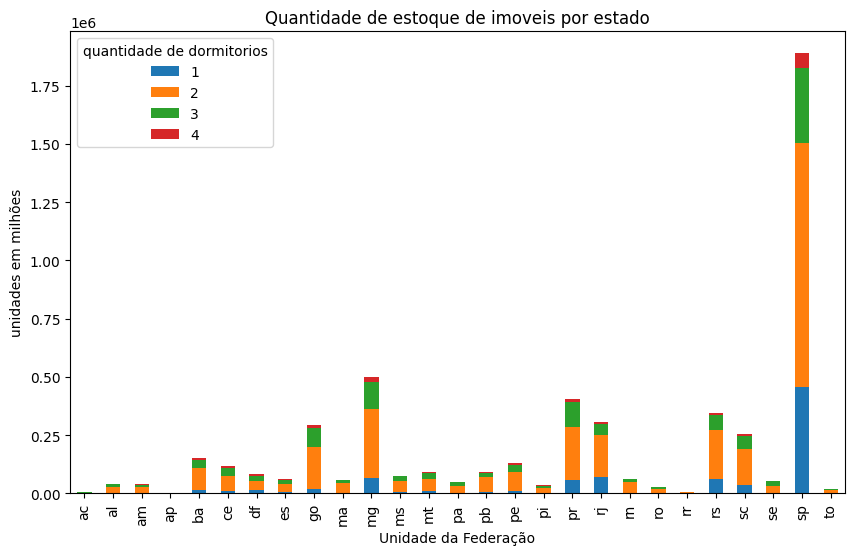

In [231]:
dormitorios_estado = imoveis_dormitorios[~imoveis_dormitorios['estado'].isin(['br'])]
dormitorios_barra = dormitorios_estado.groupby(['estado','quantidade de dormitorios'])['unidades vendidas'].sum().unstack()

ax = dormitorios_barra.plot(kind = 'bar', stacked = 'True', figsize = (10,6))
#ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x/1_000_000_000}' ))
plt.title('Quantidade de estoque de imoveis por estado')
plt.ylabel('unidades em milhões')
plt.xlabel('Unidade da Federação')

Text(0.5, 0, 'Unidade da Federação')

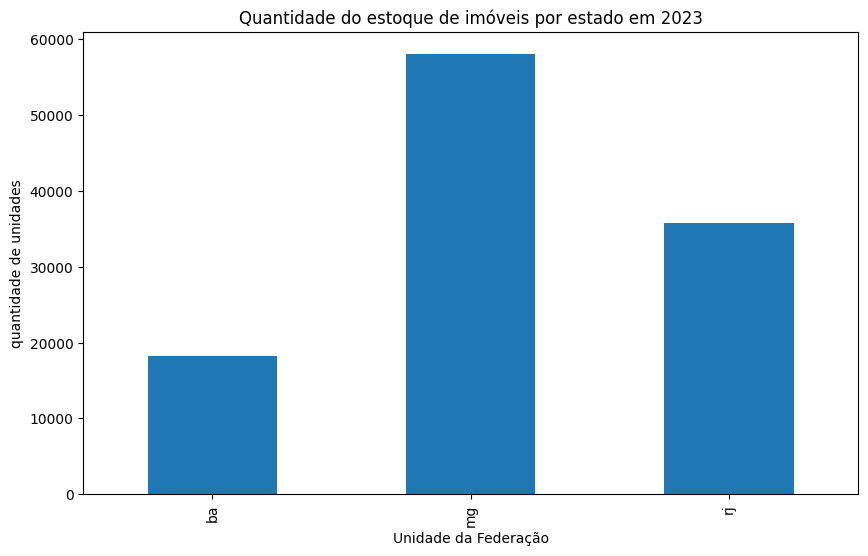

In [232]:
#filtrando esses valores por ano para termos uma melhor visualização ao longo do tempo


dormitorios_data = imoveis_dormitorios[imoveis_dormitorios['data'].dt.year == 2023]
dormitorios_data = dormitorios_data[dormitorios_data['estado'].isin([ 'mg', 'ba', 'rj'])]
dormitorio_data_linha = dormitorios_data.groupby(['estado'])['unidades vendidas'].sum()

ax = dormitorio_data_linha.plot(kind = 'bar', figsize=(10,6))
#ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x/1_000}' ))
plt.title('Quantidade do estoque de imóveis por estado em 2023')
plt.ylabel('quantidade de unidades')
plt.xlabel('Unidade da Federação')

In [233]:
#dormitorios_estado = imoveis_dormitorios[imoveis_dormitorios['estado'].isin(['br'])]
#dormitorios_estado= dormitorios_estado.groupby(['data','quantidade de dormitorios'])['unidades vendidas'].sum()
#dormitorios_estado
#plt.plot(dormitorios_estado['data'], dormitorios_estado['unidades vendidas'], linestyle = '-', color = 'b')

dormitorios_pivot = imoveis_dormitorios[~imoveis_dormitorios['estado'].isin(['br'])]
dormitorios_pivot = dormitorios_pivot.pivot_table(index = dormitorios_pivot['data'], columns= ['quantidade de dormitorios'], values= 'unidades vendidas' )
dormitorios_pivot


quantidade de dormitorios,1,2,3,4
data,,,,
2018-01-31,274.538462,1289.000000,393.777778,65.640000
2018-02-28,251.692308,1204.000000,349.518519,60.038462
2018-03-31,347.920000,1502.037037,425.555556,69.740741
2018-04-30,326.153846,1605.222222,446.592593,77.629630
2018-05-31,336.074074,1690.925926,489.629630,85.320000
...,...,...,...,...
2023-12-31,141.115385,938.703704,465.481481,70.666667
2024-01-31,147.307692,1042.703704,424.333333,59.962963
2024-02-29,88.037037,779.037037,266.740741,47.440000


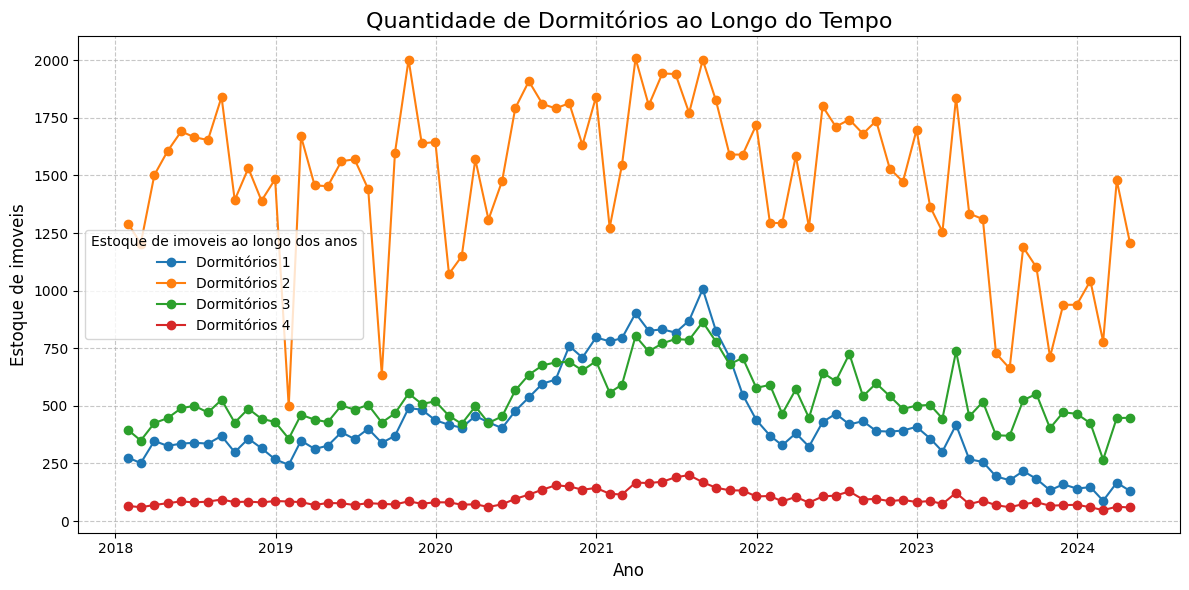

In [234]:
plt.figure(figsize=(12, 6))

for column in dormitorios_pivot:
    plt.plot(dormitorios_pivot.index, dormitorios_pivot[column], marker='o', linestyle='-', label=f'Dormitórios {column}')

# Configurar título e rótulos
plt.title('Quantidade de Dormitórios ao Longo do Tempo', fontsize=16)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Estoque de imoveis', fontsize=12)
plt.legend(title='Estoque de imoveis ao longo dos anos')
plt.grid(True, linestyle='--', alpha=0.7)

# Ajustar o layout
plt.tight_layout()

# Mostrar o gráfico
plt.show()

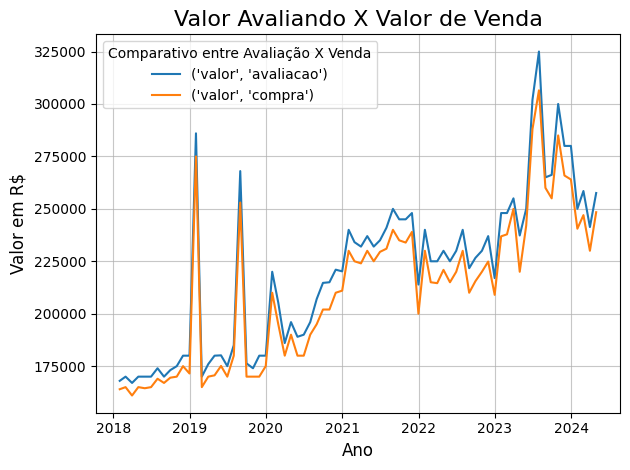

In [235]:
imoveis_venda_estado = imoveis_venda[imoveis_venda['estado'].isin(['br'])]
g_venda = imoveis_venda_estado.pivot_table(index=imoveis_venda_estado['data'], columns= ['venda'], values=['valor'])

for column in g_venda:
    plt.plot(g_venda.index, g_venda[column],  linestyle='-', label=f'{column}')

# Configurar título e rótulos
plt.title('Valor Avaliando X Valor de Venda', fontsize=16)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Valor em R$', fontsize=12)
plt.legend(title='Comparativo entre Avaliação X Venda')
plt.grid(True, linestyle='-', alpha=0.7)

# Ajustar o layout
plt.tight_layout()

# Mostrar o gráfico
plt.show()



In [236]:
imoveis_venda.info()
imoveis_area.info()
imoveis_conc = imoveis_area.merge(imoveis_venda, how = 'inner', on= ['data', 'estado'])
imoveis_conc = imoveis_conc[~imoveis_conc['estado'].isin(['br'])]



<class 'pandas.core.frame.DataFrame'>
Index: 4256 entries, 113787 to 349391
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   data    4256 non-null   datetime64[ns]
 1   valor   4256 non-null   float64       
 2   estado  4256 non-null   object        
 3   venda   4256 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 166.2+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 4256 entries, 113772 to 349449
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   data      4256 non-null   datetime64[ns]
 1   valor m2  4256 non-null   float64       
 2   estado    4256 non-null   object        
 3   area      4256 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 166.2+ KB


,data,valor m2,estado,area,valor,venda
0,2018-01-31,64.99,se,privativa,133500.00,avaliacao
1,2018-01-31,64.99,se,privativa,130000.00,compra
2,2018-01-31,62.18,sc,privativa,163304.78,avaliacao
3,2018-01-31,62.18,sc,privativa,160000.00,compra
4,2018-01-31,60.00,mg,privativa,150500.00,avaliacao
...,...,...,...,...,...,...
8505,2024-04-30,101.48,to,total,241550.00,avaliacao
8508,2024-04-30,80.13,sc,total,300000.00,compra
8509,2024-04-30,80.13,sc,total,314500.00,avaliacao
8510,2024-04-30,79.57,se,total,171000.00,compra


In [255]:
pivot_imoveis = imoveis_conc.pivot_table(index= imoveis_conc['data'], columns=['venda', 'area'], values = ['valor m2', 'valor'])

In [256]:
analise=imoveis_conc.groupby(['data', 'area','estado'])['valor'].sum()/imoveis_conc.groupby(['data', 'area','estado'])['valor m2'].sum()


In [281]:
analise_estado = analise.loc[analise.index.get_level_values('estado') == 'mg']
analise_estado = analise_estado.reset_index()


In [283]:
analise_estado.columns = ['data','area','estado', 'valor m2']

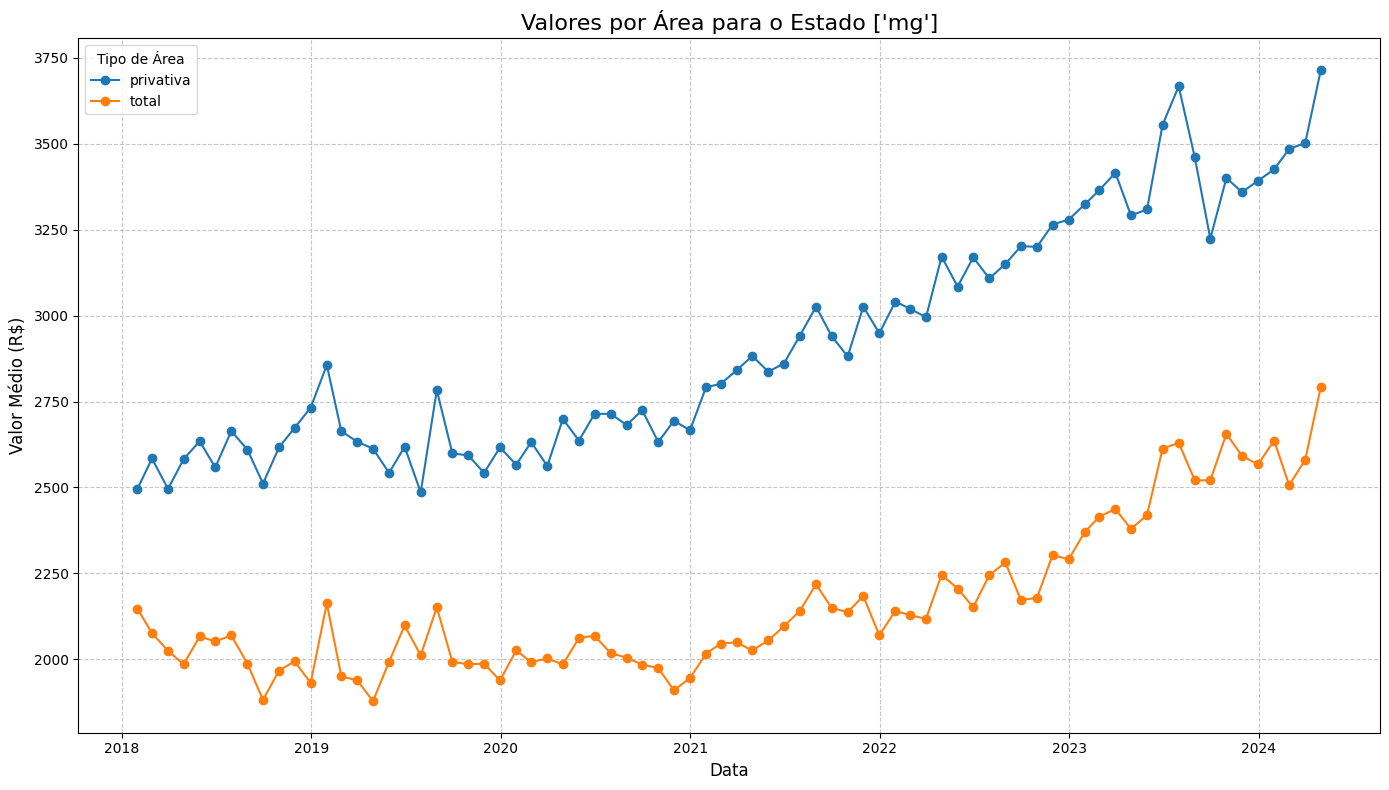

In [284]:
# Criar a figura e os eixos
fig, ax = plt.subplots(figsize=(14, 8))

# Plotar os valores para cada área (privativa ou total)
for area_tipo in analise_estado['area'].unique():
    grupo = analise_estado[analise_estado['area'] == area_tipo]
    ax.plot(grupo['data'], grupo['valor m2'], marker='o', linestyle='-', label=f'{area_tipo}')

# Configurar título e rótulos
ax.set_title(f'Valores por Área para o Estado {analise_estado['estado'].unique()}', fontsize=16)
ax.set_xlabel('Data', fontsize=12)
ax.set_ylabel('Valor Médio (R$)', fontsize=12)

# Configurar a legenda
ax.legend(title='Tipo de Área')

# Configurar a grade
ax.grid(True, linestyle='--', alpha=0.7)

# Ajustar o layout
plt.tight_layout()

# Mostrar o gráfico
plt.show()


In [215]:
for coluna in pivot_imoveis:
    print(coluna)

('valor', 'avaliacao', 'privativa')
('valor', 'avaliacao', 'total')
('valor', 'compra', 'privativa')
('valor', 'compra', 'total')
('valor m2', 'avaliacao', 'privativa')
('valor m2', 'avaliacao', 'total')
('valor m2', 'compra', 'privativa')
('valor m2', 'compra', 'total')


In [212]:
imoveis_conc['valor m2'] = pd.to_numeric(imoveis_conc['valor m2'])
imoveis_conc['valor'] =pd.to_numeric(imoveis_conc['valor'])

imoveis_conc.groupby(['data', 'venda', 'area']).


TypeError: unhashable type: 'Series'